In [1]:
import pandas as pd
!pip install category_encoders
import category_encoders as ce 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

data=pd.read_csv('ObesityDataSet.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [4]:
data['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [5]:
for col in data.select_dtypes('object').columns:
    print(data[col].value_counts())
    print('\n')

Gender
Male      1068
Female    1043
Name: count, dtype: int64


family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


FAVC
yes    1866
no      245
Name: count, dtype: int64


CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


SMOKE
no     2067
yes      44
Name: count, dtype: int64


SCC
no     2015
yes      96
Name: count, dtype: int64


CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64


MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64




In [6]:
#for col in data.select_dtypes('object').columns:
#    print(data[[col,'NObeyesdad']].value_counts().sort_index())
#    print('\n')

In [7]:
for col in data.select_dtypes('object').columns:
    print(data[col].
        value_counts().sort_index())
    print('\n')

Gender
Female    1043
Male      1068
Name: count, dtype: int64


family_history_with_overweight
no      385
yes    1726
Name: count, dtype: int64


FAVC
no      245
yes    1866
Name: count, dtype: int64


CAEC
Always          53
Frequently     242
Sometimes     1765
no              51
Name: count, dtype: int64


SMOKE
no     2067
yes      44
Name: count, dtype: int64


SCC
no     2015
yes      96
Name: count, dtype: int64


CALC
Always           1
Frequently      70
Sometimes     1401
no             639
Name: count, dtype: int64


MTRANS
Automobile                457
Bike                        7
Motorbike                  11
Public_Transportation    1580
Walking                    56
Name: count, dtype: int64


NObeyesdad
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
Name: count, dtype: int64




In [8]:
data.loc[data.CALC=='Always']

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
26,Male,21.0,1.7,65.0,yes,yes,2.0,1.0,Frequently,no,2.0,no,1.0,2.0,Always,Walking,Normal_Weight


In [9]:
data.loc[26,'CALC']='Frequently' # Transform CALC's 'Allways' into 'Frequently' to avoid overfiting.

In [10]:
data.loc[26]

Gender                                     Male
Age                                        21.0
Height                                      1.7
Weight                                     65.0
family_history_with_overweight              yes
FAVC                                        yes
FCVC                                        2.0
NCP                                         1.0
CAEC                                 Frequently
SMOKE                                        no
CH2O                                        2.0
SCC                                          no
FAF                                         1.0
TUE                                         2.0
CALC                                 Frequently
MTRANS                                  Walking
NObeyesdad                        Normal_Weight
Name: 26, dtype: object

In [11]:
data['MTRANS'] = data['MTRANS'].replace(['Walking', 'Motorbike', 'Bike'], 'Other')

In [12]:
data['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Other                      74
Name: count, dtype: int64

In [13]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Other,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
data['Gender']=data.Gender.replace({
    'Male': 0,
    'Female': 1
})

In [15]:
for col in ['family_history_with_overweight','FAVC','SCC','SMOKE']:
    data[col].replace({
    'yes': 0,
    'no': 1
    },
        inplace=True
    )

In [16]:
data['NObeyesdad'].value_counts().index

Index(['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II',
       'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight',
       'Insufficient_Weight'],
      dtype='object', name='NObeyesdad')

In [17]:
ohencoder=ce.OneHotEncoder(cols=['CAEC', 'CALC', 'MTRANS'], use_cat_names=True)
ordenconder=ce.ordinal.OrdinalEncoder(
    cols=['NObeyesdad'], 
    mapping=[{'col':'NObeyesdad', 
              'mapping':{
                  'Obesity_Type_I':4,
                  'Obesity_Type_III':6,
                  'Obesity_Type_II':5,
                  'Overweight_Level_I':2, 
                  'Overweight_Level_II':3, 
                  'Normal_Weight':1,
                  'Insufficient_Weight':0
             }}
            ]
)

In [18]:
data= ordenconder.fit_transform(data)

In [19]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.000000,1.620000,64.000000,0,1,2.0,3.0,Sometimes,1,2.000000,1,0.000000,1.000000,no,Public_Transportation,1
1,1,21.000000,1.520000,56.000000,0,1,3.0,3.0,Sometimes,0,3.000000,0,3.000000,0.000000,Sometimes,Public_Transportation,1
2,0,23.000000,1.800000,77.000000,0,1,2.0,3.0,Sometimes,1,2.000000,1,2.000000,1.000000,Frequently,Public_Transportation,1
3,0,27.000000,1.800000,87.000000,1,1,3.0,3.0,Sometimes,1,2.000000,1,2.000000,0.000000,Frequently,Other,2
4,0,22.000000,1.780000,89.800000,1,1,2.0,1.0,Sometimes,1,2.000000,1,0.000000,0.000000,Sometimes,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,0,0,3.0,3.0,Sometimes,1,1.728139,1,1.676269,0.906247,Sometimes,Public_Transportation,6
2107,1,21.982942,1.748584,133.742943,0,0,3.0,3.0,Sometimes,1,2.005130,1,1.341390,0.599270,Sometimes,Public_Transportation,6
2108,1,22.524036,1.752206,133.689352,0,0,3.0,3.0,Sometimes,1,2.054193,1,1.414209,0.646288,Sometimes,Public_Transportation,6
2109,1,24.361936,1.739450,133.346641,0,0,3.0,3.0,Sometimes,1,2.852339,1,1.139107,0.586035,Sometimes,Public_Transportation,6


In [20]:
X= data.drop(columns='NObeyesdad')
y= data['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(y_train.value_counts(normalize=True).sort_index())
print(y_test.value_counts(normalize=True).sort_index())

NObeyesdad
0    0.128639
1    0.136087
2    0.137441
3    0.137441
4    0.165877
5    0.140826
6    0.153690
Name: proportion, dtype: float64
NObeyesdad
0    0.129338
1    0.135647
2    0.137224
3    0.137224
4    0.167192
5    0.140379
6    0.152997
Name: proportion, dtype: float64


In [21]:
ohe_X_train= ohencoder.fit_transform(X_train)
ohe_X_test= ohencoder.transform(X_test)
display(ohe_X_train)
ohe_X_test


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Sometimes,CAEC_no,...,CH2O,SCC,FAF,TUE,CALC_no,CALC_Sometimes,CALC_Frequently,MTRANS_Public_Transportation,MTRANS_Automobile,MTRANS_Other
1791,0,24.001889,1.614075,100.245302,0,0,2.880483,1.703299,1,0,...,1.006378,1,1.076729,1.058007,1,0,0,1,0,0
1910,1,21.521294,1.803677,160.639405,0,0,3.000000,3.000000,1,0,...,2.404049,1,0.427905,0.639894,0,1,0,1,0,0
1316,0,39.656559,1.789992,98.021766,0,0,2.043359,2.209314,1,0,...,2.785804,1,1.259613,0.669616,0,1,0,0,1,0
1632,0,28.992809,1.909105,129.874864,0,0,2.206119,3.000000,1,0,...,1.483856,1,1.113169,0.000000,0,1,0,1,0,0
145,0,21.000000,1.620000,70.000000,1,0,2.000000,1.000000,0,1,...,3.000000,1,1.000000,0.000000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1,22.000000,1.650000,58.000000,0,0,3.000000,4.000000,0,0,...,2.000000,1,1.000000,0.000000,0,1,0,1,0,0
930,1,21.009437,1.606810,67.773914,0,0,2.000000,3.156309,0,1,...,3.000000,1,1.179592,0.086868,0,1,0,1,0,0
2105,1,21.285965,1.726920,131.335786,0,0,3.000000,3.000000,1,0,...,1.796267,1,1.728332,0.897924,0,1,0,1,0,0
72,1,24.000000,1.650000,60.000000,0,1,2.000000,3.000000,1,0,...,3.000000,0,1.000000,0.000000,1,0,0,1,0,0


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_Sometimes,CAEC_no,...,CH2O,SCC,FAF,TUE,CALC_no,CALC_Sometimes,CALC_Frequently,MTRANS_Public_Transportation,MTRANS_Automobile,MTRANS_Other
246,1,20.000000,1.570000,60.000000,1,0,3.000000,3.000000,1,0,...,3.000000,1,0.000000,1.000000,0,1,0,1,0,0
1760,0,31.490699,1.773521,120.209711,0,0,2.777165,3.000000,1,0,...,2.106861,1,0.925941,0.291600,0,1,0,0,1,0
291,0,17.000000,1.800000,58.000000,1,0,2.000000,3.000000,0,0,...,2.000000,1,2.000000,1.000000,1,0,0,0,0,1
1110,0,24.657598,1.708800,83.520113,0,0,2.689577,2.714115,1,0,...,2.279214,1,0.970661,0.828549,0,1,0,1,0,0
521,1,19.000000,1.564199,42.096062,1,0,3.000000,1.894384,1,0,...,2.456581,0,1.596576,0.997400,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,1,26.000000,1.631547,111.588625,0,0,3.000000,3.000000,1,0,...,2.554007,1,0.000000,0.252635,0,1,0,1,0,0
1883,1,26.000000,1.631332,111.829957,0,0,3.000000,3.000000,1,0,...,2.559750,1,0.000000,0.237307,0,1,0,1,0,0
687,1,22.867719,1.655413,50.424661,0,0,3.000000,3.642802,0,0,...,1.995177,1,0.118271,0.065515,1,0,0,1,0,0
1492,0,18.000000,1.782722,108.044313,0,0,2.000000,2.655265,1,0,...,2.297896,1,1.000000,0.552665,1,0,0,1,0,0


In [22]:
rf= RandomForestClassifier(random_state=42)

rf.fit(ohe_X_train,y_train)
print(rf.score(ohe_X_train,y_train))
print(rf.score(ohe_X_test,y_test))

1.0
0.9400630914826499


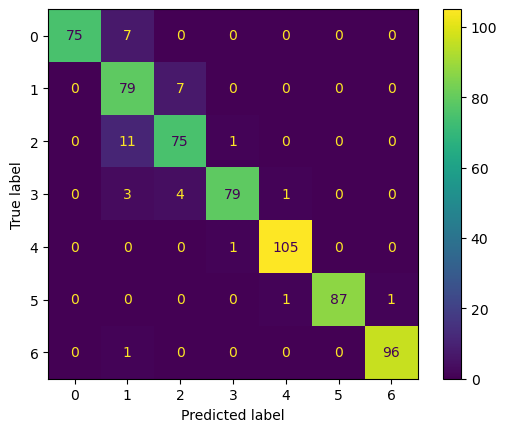

In [23]:
conf_matrix=confusion_matrix(y_true=y_test, y_pred=rf.predict(ohe_X_test))
ConfusionMatrixDisplay(confusion_matrix= conf_matrix).plot()

In [24]:
xg= XGBClassifier(random_state=42)

xg.fit(ohe_X_train,y_train)
print(xg.score(ohe_X_train,y_train))
print(xg.score(ohe_X_test,y_test))

1.0
0.9542586750788643


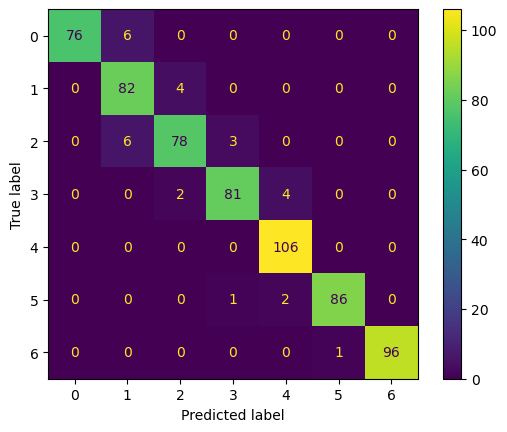

In [25]:
conf_matrix=confusion_matrix(y_true=y_test, y_pred=xg.predict(ohe_X_test))
ConfusionMatrixDisplay(confusion_matrix= conf_matrix).plot()

In [26]:
rxgb=XGBClassifier(random_state=42)
param_distributions= {
    'n_estimators' : [None, 10, 100, 30],
    'max_depth' : [None, 5, 10, 50, 100, 500, 1000],
    'reg_alpha' :[0, 0.1, 1.5, 0.001],
    'reg_lambda' :[0, 0.1, 1.5, 0.001]
}
random_search=RandomizedSearchCV(
    estimator=rxgb,
    param_distributions=param_distributions,
    n_iter=10,
    random_state=123,
)
random_search.fit(ohe_X_train, y_train)


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   param_distributions={'max_depth': [None, 5, 10, 50, 100, 500,
                                                      1000],
                                        'n_estimators': [None, 10, 100, 30],
                                        'reg_alpha': [0, 0.1, 1.5, 0.001],
                                        'reg_lambda': [0, 0.1, 1.5, 0.001]},
                   random_state=123)

In [27]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_reg_alpha,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.141526,0.001047,0.008704,0.000872,0.1,0,30,None,"{'reg_lambda': 0.1, 'reg_alpha': 0, 'n_estimat...",0.979730,0.979730,0.959322,0.949153,0.969492,0.967485,0.011888,2
1,0.059610,0.002129,0.009006,0.000623,0.1,0.1,10,5,"{'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estim...",0.972973,0.945946,0.952542,0.925424,0.928814,0.945140,0.017236,8
2,0.372374,0.012012,0.009202,0.000399,1.5,0,100,None,"{'reg_lambda': 1.5, 'reg_alpha': 0, 'n_estimat...",0.986486,0.983108,0.966102,0.959322,0.969492,0.972902,0.010305,1
3,0.335666,0.005012,0.008905,0.000196,0.001,0,100,50,"{'reg_lambda': 0.001, 'reg_alpha': 0, 'n_estim...",0.986486,0.969595,0.966102,0.949153,0.952542,0.964776,0.013342,4
4,0.362185,0.018039,0.009800,0.000400,0.001,0.1,100,50,"{'reg_lambda': 0.001, 'reg_alpha': 0.1, 'n_est...",0.986486,0.972973,0.966102,0.949153,0.959322,0.966807,0.012598,3
5,0.008600,0.000490,0.000000,0.000000,0.001,1.5,None,50,"{'reg_lambda': 0.001, 'reg_alpha': 1.5, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
6,0.298568,0.021289,0.008802,0.000397,0.001,1.5,100,5,"{'reg_lambda': 0.001, 'reg_alpha': 1.5, 'n_est...",0.989865,0.945946,0.969492,0.938983,0.949153,0.958688,0.018603,5
7,0.064817,0.001398,0.008200,0.000400,0.1,0.001,10,5,"{'reg_lambda': 0.1, 'reg_alpha': 0.001, 'n_est...",0.969595,0.942568,0.962712,0.915254,0.938983,0.945822,0.019195,7
8,0.089519,0.001096,0.009000,0.000001,0.1,0.001,10,500,"{'reg_lambda': 0.1, 'reg_alpha': 0.001, 'n_est...",0.972973,0.956081,0.952542,0.938983,0.932203,0.950557,0.014197,6
9,0.008502,0.000637,0.000000,0.000000,0.001,1.5,None,None,"{'reg_lambda': 0.001, 'reg_alpha': 1.5, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [28]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

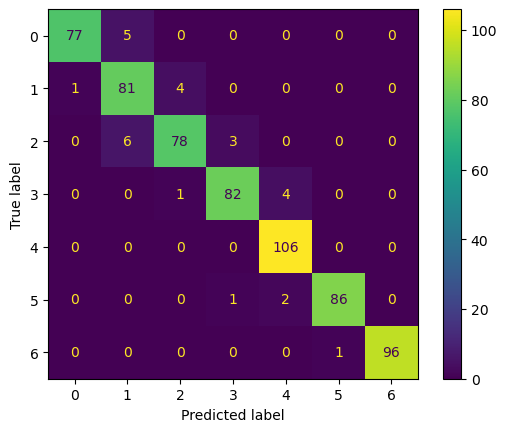

In [30]:
conf_matrix=confusion_matrix(y_true=y_test, y_pred=random_search.best_estimator_.predict(ohe_X_test))
ConfusionMatrixDisplay(confusion_matrix= conf_matrix).plot()